In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [33]:
df=pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [35]:
df.shape

(2416, 7)

In [36]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [37]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [38]:
#identify and handle missing data

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [39]:
df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [40]:
df.fillna(0)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


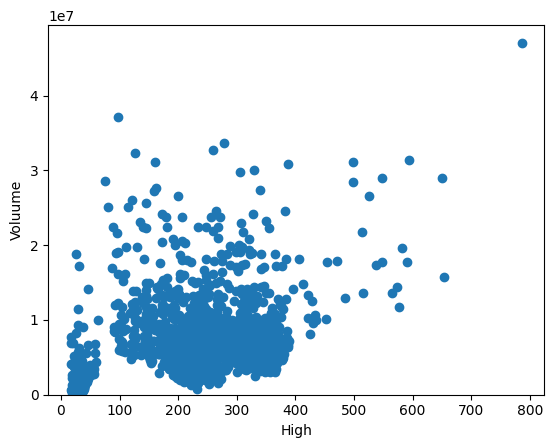

In [41]:
#visualize your data
# Histogram
df["High"].plot.hist(bins=20)

# Scatter plot
plt.scatter(df["High"], df["Volume"])
plt.xlabel("High")
plt.ylabel("Voluume")
plt.show()

In [42]:
# Grouping and aggregating data
grouped_data = df.groupby("Volume")["Low"].mean()


In [43]:
# create linear regression model
regr=LinearRegression()
x=df[["High","Volume"]]
y=df["Low"]

regr.fit(x, y)
y_pred=regr.predict(x)
r2=r2_score(y,y_pred)
print("R-squared score:",r2)

R-squared score: 0.9992754485070338


In [44]:
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(x, y)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(x, y)

GradientBoostingRegressor()

In [45]:
# Random Forest predictions
rf_predictions = rf_model.predict(x)

# Gradient Boosting predictions
gb_predictions = gb_model.predict(x)

In [46]:
ensemble_predictions = (y_pred + rf_predictions + gb_predictions) / 3

In [47]:
# Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(x, y.astype(int))

# Decision Tree model
decision_model = DecisionTreeClassifier()
decision_model.fit(x, y.astype(int))

DecisionTreeClassifier()

In [48]:
# Logistic Regression predictions
logistic_predictions = logistic_model.predict(x)

# Decision Tree predictions
decision_predictions = decision_model.predict(x)

In [49]:
mean = df['High'].mean()

print(mean)

189.5782242562086


In [50]:
median = df['Low'].median()

print(median)

208.8700025


In [51]:
mode = df['Adj Close'].mode()

print(mode)

0    27.42
Name: Adj Close, dtype: float64


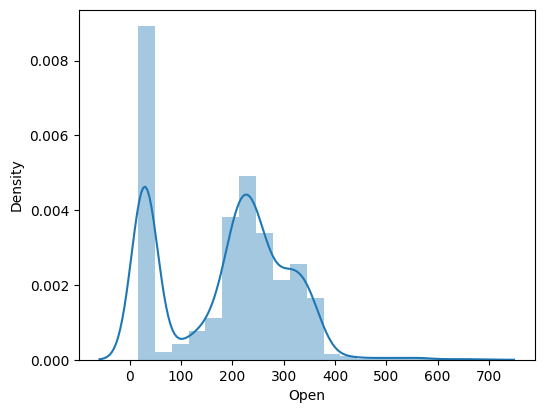

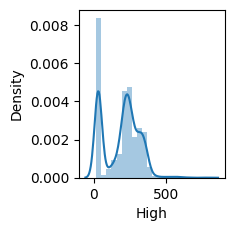

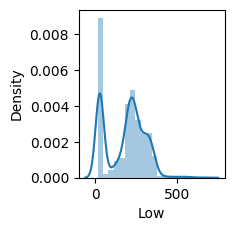

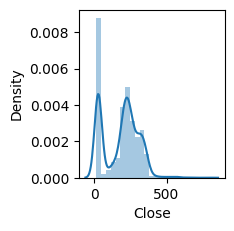

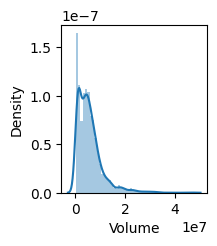

In [52]:
#data visualisation
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
 plt.subplot(2,3,i+1)
 sb.distplot(df[col])
 plt.show()


plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
 plt.subplot(2,3,i+1)
 sb.boxplot(df[col])
 plt.show()


208.8700025
0    27.42
Name: Adj Close, dtype: float64


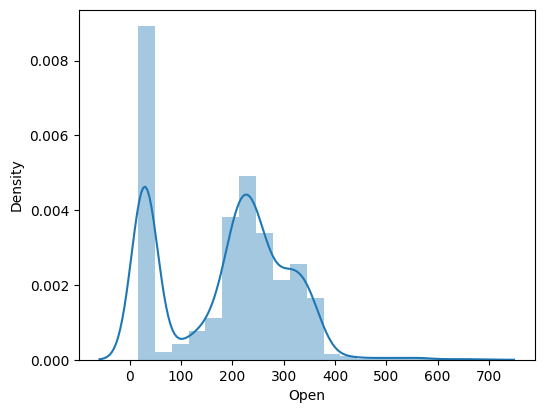

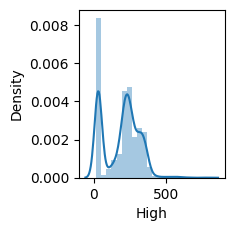

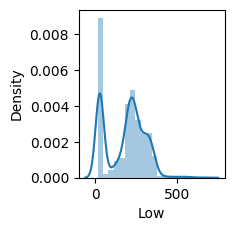

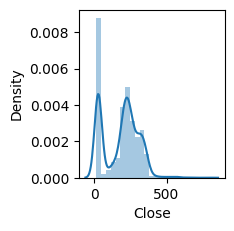

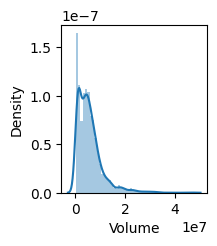

,Date,Open,High,Low,Close,Adj Close,Volume,month,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,6,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,6,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,7,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,7,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,7,0


In [53]:
#feature enginering
df['month'] = pd.to_datetime(df['Date']).dt.month
median = df['Low'].median()
print(median)
mode = df['Adj Close'].mode()
print(mode)
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
  plt.show()
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


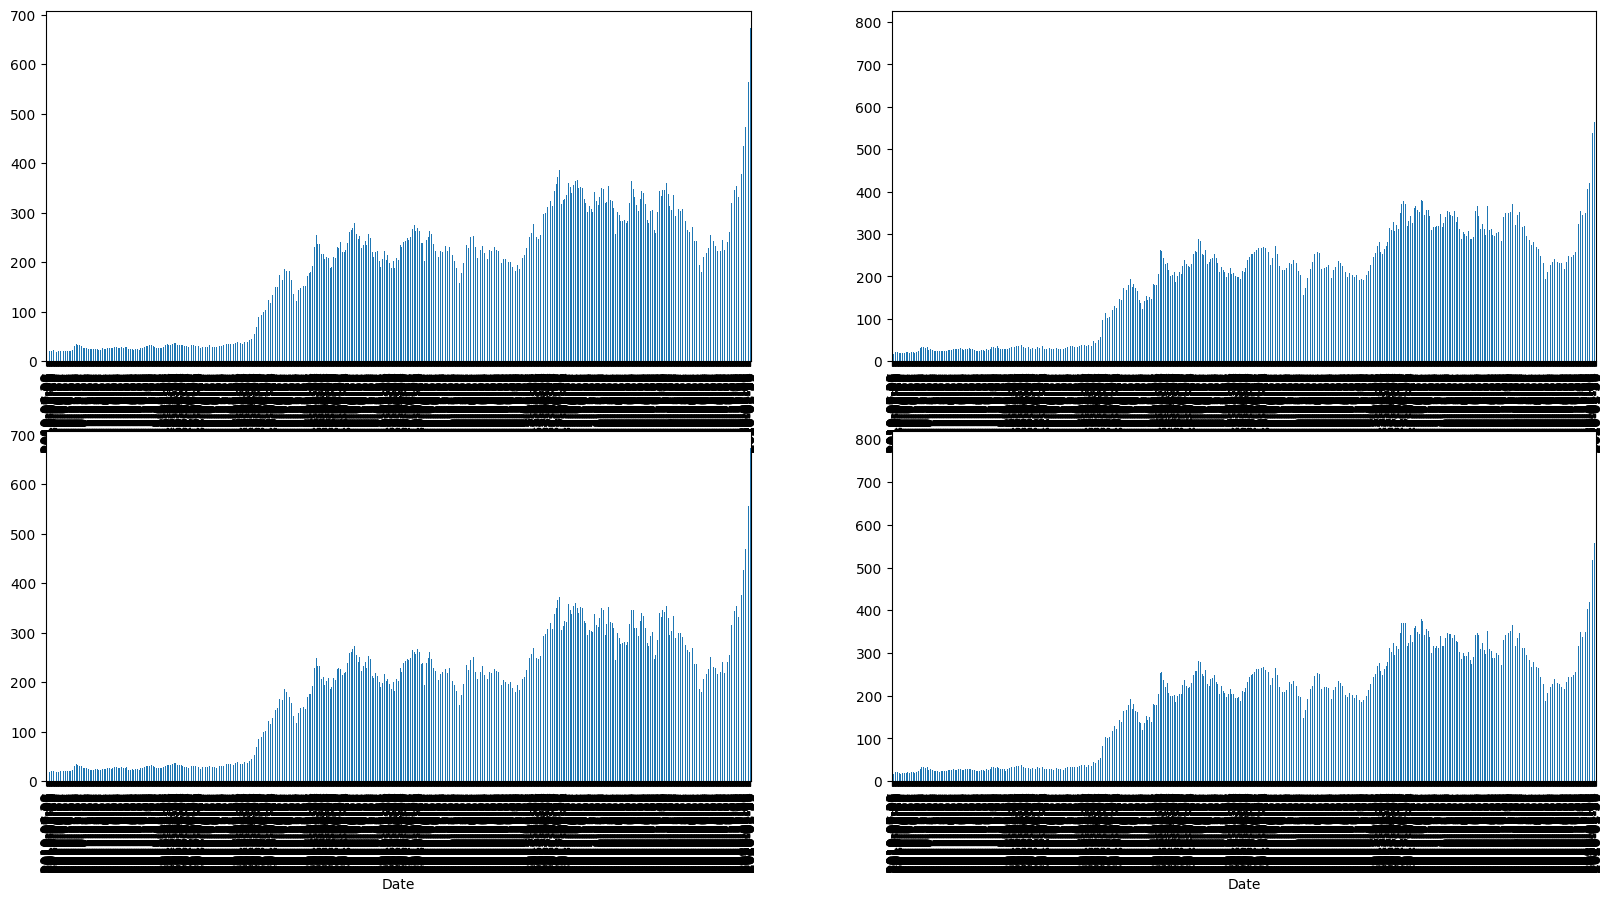

In [54]:
data_grouped = df.groupby('Date').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [55]:
df.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Adj Close,Volume,month
is_quarter_end,,,,,,,
0,185.875081,189.254226,182.449499,186.085081,186.085081,5.767062e+06,6.173886
1,187.071200,190.232700,183.860262,187.047163,187.047163,5.180154e+06,7.597500


In [56]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


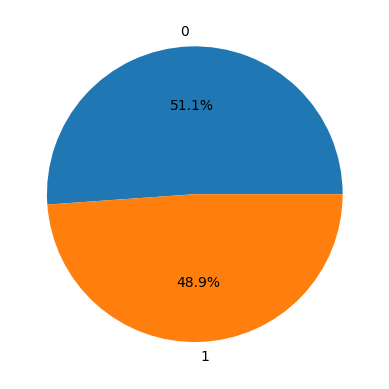

In [57]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


In [58]:
#data splitting
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(2174, 3) (242, 3)


In [59]:
#Logistic Regression, Support Vector Machine, XGBClassifier
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
 models[i].fit(X_train, Y_train)

print(f'{models[i]} : ')
print('Training Accuracy : ', metrics.roc_auc_score(
	Y_train, models[i].predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(
	Y_valid, models[i].predict_proba(X_valid)[:,1]))
print()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9382749759754802
Validation Accuracy :  0.4496784345922277

